## Generative models

In short, generative models belong to a class of statistical models that are capable of generating new instances based on a dataset. Typically, these models are utilized in unsupervised learning.

Formally, we can think of a dataset as a sequence of instances $x_1, x_2, ..., x_n$ from a data probability distribution $p(x)$. In the example image below, the blue region represents the part of the image space that contains real images with a high probability (above some threshold), while the black dots indicate our data points (each representing an image in our dataset).

<div style="text-align:center;">
    <img src="./images/gm.png" alt="Example Image" style="width:600px;">
</div>
We can define our generative model as a probability distribution with $\theta$ parameters, denoted as $\hat p_{\theta}(x)$. It's important to note that we define this distribution using points from a Gaussian unit. Therefore, we need to find $\theta$ parameters that satisfy our requirements: generating new data $x'$ consistently.

In this context, we will be creating various generative models and exploring both experimentation and theory. Let's begin by discussing the first architecture that we will be constructing.

### Autoencoders

This architecture is very important to us, because autoencoders are a base for some popular generative models. Autoencoders have power to compress data and reconstruct data. Basicaly, this is very interesting because, first application can be compress data and you can spend less memory for any application (yay!). But autoencoder can be much more! Let's check this out and see architecture below:

<!-- ![Example Image](./imgs/autoencoder_architecture.png) -->
<div style="text-align:center;">
    <img src="./images/autoencoder_architecture.png" alt="Example Image" style="width:600px;">
</div>

In here, we can see architecture and loss function that we must to use. This loss is called by "Reconstruction Loss", because when system minimizes this, we can to turn output aproximates by input. 

$$\text{Reconstruction Loss} = \text{MSE}(x, \hat x)$$

Before we in fact construct some generative architecture, lets build an autoencoder and check some theory subjects! Spoiler: You will learn about **latent space** (Latent space is a little bit abstact, think about him like a something in Matrix)

### 1) Import dependencies

In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lets check your GPU
if tf.config.list_logical_devices('GPU') != []:
    print("LET'S DO THISS!!! :DDDD")
else: 
    print("Oh dude... D:")

LET'S DO THISS!!! :DDDD


In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "generative"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2) Load Dataset (MNIST)

We will use MNIST dataset. 

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
def plot_image(image):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
def plot_grid_images(images):
    n_images = len(images)
    fig = plt.figure(figsize=(n_images * 1.5, 2))
    for img_idx in range(n_images):
        plt.subplot(2, n_images, 1 + img_idx)
        plot_image(images[img_idx])

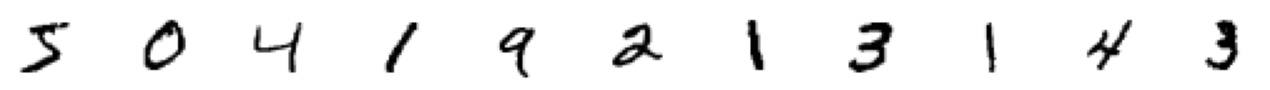

In [6]:
plot_grid_images(X_train_full[:11])

In [7]:
# Preprocessing data
X_train_full, X_test = X_train_full.astype(np.float32) / 255, X_test.astype(np.float32) / 255
X_train, X_val = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_val = y_train_full[:-5000], y_train_full[-5000:]

### 3) Build Architecture using Keras

In [10]:
encoder = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(30, activation='relu')
])

decoder = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(28 * 28),
    keras.layers.Reshape([28, 28])
])

In [11]:
autoencoder = keras.Sequential([encoder, decoder])

autoencoder.compile(loss='mse', optimizer='adam')
history = autoencoder.fit(
    X_train, X_train,
    validation_data=(X_val, X_val),
    epochs=20
)

Epoch 1/20
1719/1719 [==============================] - 14s 6ms/step - loss: 0.0299 - val_loss: 0.0235
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0225 - val_loss: 0.0215
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0211 - val_loss: 0.0205
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0203 - val_loss: 0.0197
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0196 - val_loss: 0.0189
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0189 - val_loss: 0.0185
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0185 - val_loss: 0.0182
Epoch 8/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0182 - val_loss: 0.0181
Epoch 9/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0180 - val_loss: 0.0178
Epoch 10/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.01

In [15]:
def show_reconstructions(model, n_images=10):
    reconstructions = model.predict(X_val[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_val[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 92ms/step


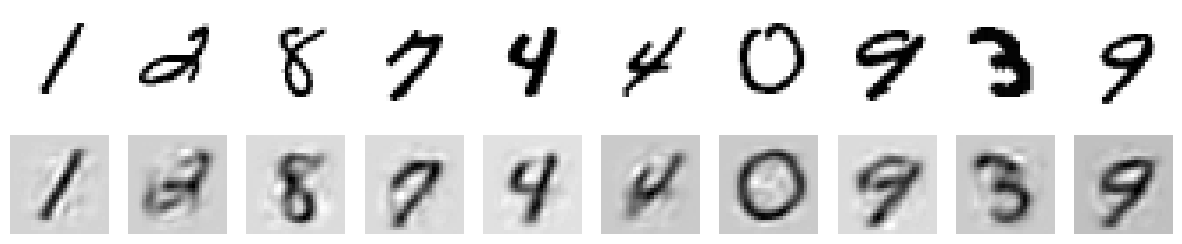

In [16]:
show_reconstructions(autoencoder)

Yay!! Look at this! We reconstruct all images using simple autoencoder! (If you not like quality images, remember your autoencoder train for few minutes, we can do better!)

### Visualizing latent space

Let's analyze this architecture. If you've noticed, the $z$ variable in the middle of the autoencoder are the input compressed data. Here, we can identify two significant aspects: data compression and dimensionality reduction (similar to PCA).

In [18]:
from sklearn.manifold import TSNE

In [18]:
X_val_latent = encoder.predict(X_val)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

157/157 [==============================] - 0s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


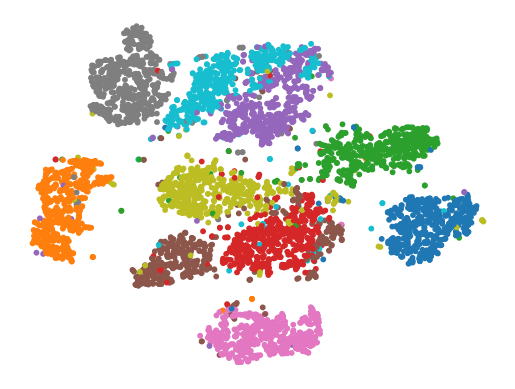

In [19]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_val, s=10, cmap='tab10')
plt.axis('off')
plt.show()

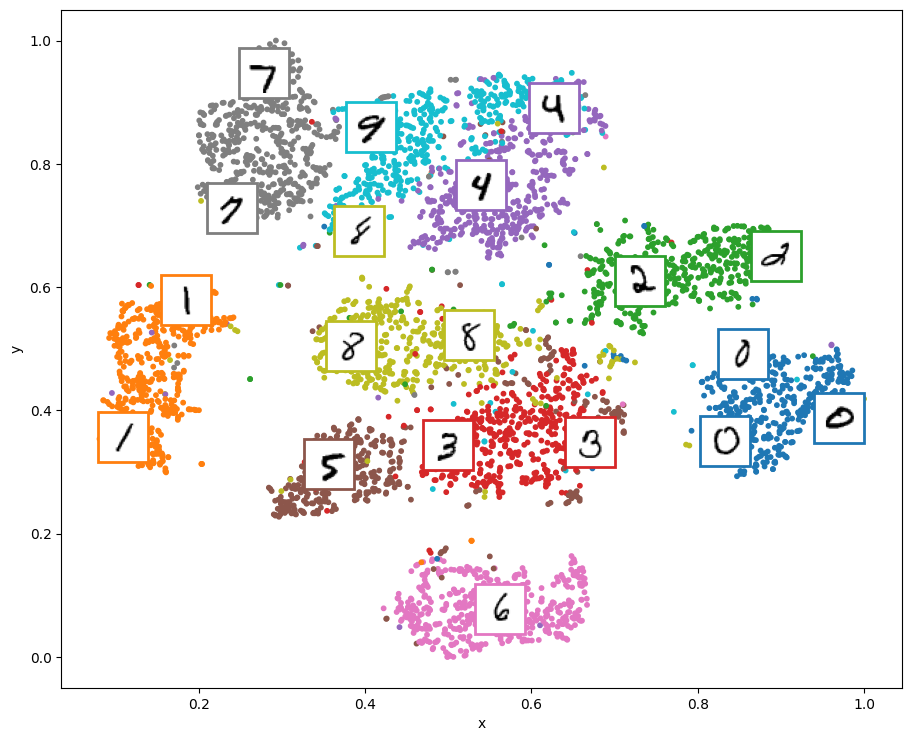

In [21]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_val, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_val[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_val[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot")
plt.show()

Look at this! In the **latent space** some semantic properties is conserved. Lets think about this using some cases:

- If you analyzes the number 3 cluster, you will note him closer to 8. Its happen because *3* shape is very similar to *8* if you slice him at the vertical axis. 
- The same ideia can be apply to *4* shape and *9* shape. Note both cluster are closer!

Some semantic in this case are very similar to embeddings semantics: $$f(Queen) - f(King) = f(Girl) - f(boy)$$

### Extra - Convolutional Autoencoders

Yes! We can do convolutional autoencoders too!

In [54]:
conv_encoder = keras.Sequential([
    keras.layers.Input(shape=[28, 28]),
    keras.layers.Reshape([28, 28, 1]),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(2),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation='sigmoid')
])

conv_decoder = keras.Sequential([
    keras.layers.Dense(7 * 7 * 64),
    keras.layers.Reshape([7, 7, 64]),
    keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu'),
    keras.layers.UpSampling2D(2),
    
    keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu'),
    keras.layers.UpSampling2D(2),
    
    keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')
    
])

In [55]:
conv_autoencoder = keras.Sequential([conv_encoder, conv_decoder])
conv_autoencoder.compile(loss='mse', optimizer='adam')

In [56]:
history_conv = conv_autoencoder.fit(
    X_train, X_train,
    validation_data=(X_val, X_val),
    epochs=20
)

Epoch 1/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0156 - val_loss: 0.0093
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 3/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0057 - val_loss: 0.0058
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0054 - val_loss: 0.0056
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 8/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0051 - val_loss: 0.0052
Epoch 9/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 10/20
1719/1719 [==============================] - 9s 5ms/step - loss: 

1/1 [==============================] - 0s 362ms/step


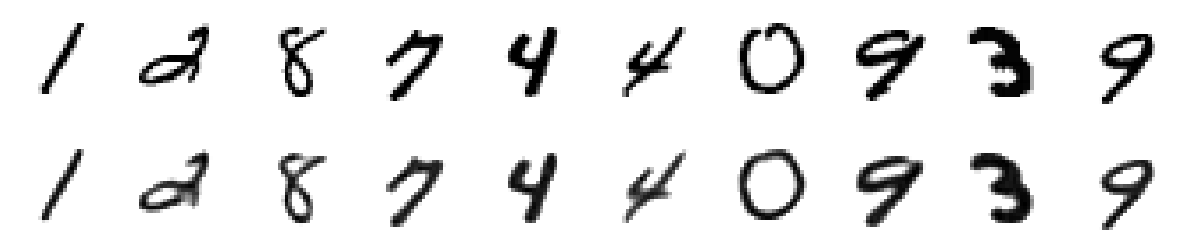

In [57]:
show_reconstructions(conv_autoencoder)

In [58]:
X_val_latent = conv_encoder.predict(X_val)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

157/157 [==============================] - 0s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


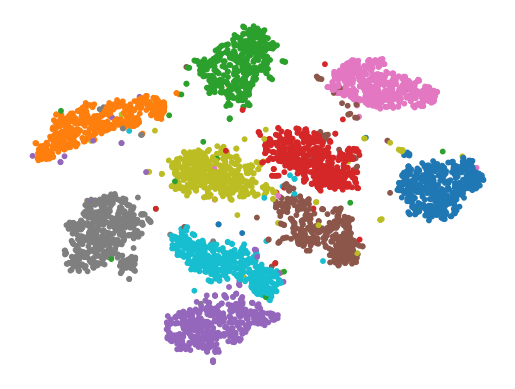

In [59]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_val, s=10, cmap='tab10')
plt.axis('off')
plt.show()

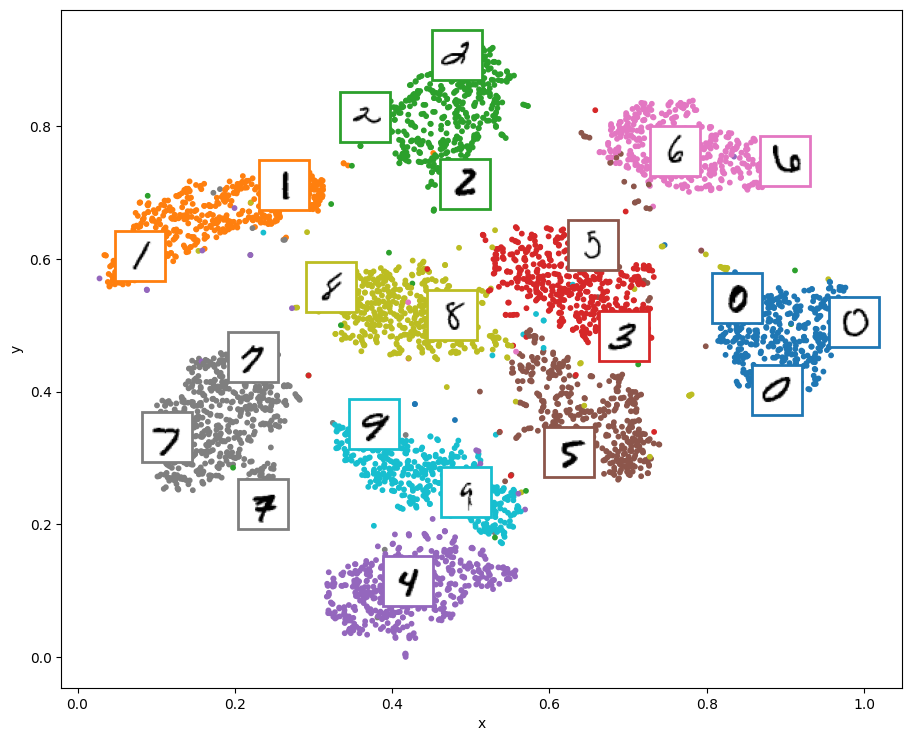

In [60]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_val, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_val[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_val[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot")
plt.show()

Note the improve of quality! But we need to take care about the size of neural network. In many cases of Neural Network is pretty complex the system learn indentity function, and its not cool! Because we want Neural network learns deep patterns about dataset and not inditity functions!

## Divergence KL

## Variational Autoencoders

In [8]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean 

In [9]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [10]:
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(7 * 7 * 64)(decoder_inputs)
x = keras.layers.Reshape((7, 7, 64))(x)
x = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

x = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x)
x = keras.layers.UpSampling2D(2)(x)

outputs = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x)

# outputs = tf.keras.layers.Reshape([28, 28])(x)
variational_decoder = tf.keras.Model(inputs=[decoder_inputs], outputs=[outputs])

In [11]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])

In [12]:
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

In [13]:
variational_ae.compile(loss="mse", optimizer="adam")
history_vae = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_val, X_val))

Epoch 1/25
430/430 [==============================] - 11s 7ms/step - loss: 0.0526 - val_loss: 0.0453
Epoch 2/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0433 - val_loss: 0.0419
Epoch 3/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0410 - val_loss: 0.0400
Epoch 4/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0399 - val_loss: 0.0395
Epoch 5/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0393 - val_loss: 0.0390
Epoch 6/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0388 - val_loss: 0.0382
Epoch 7/25
430/430 [==============================] - 3s 8ms/step - loss: 0.0384 - val_loss: 0.0383
Epoch 8/25
430/430 [==============================] - 3s 8ms/step - loss: 0.0381 - val_loss: 0.0375
Epoch 9/25
430/430 [==============================] - 3s 7ms/step - loss: 0.0378 - val_loss: 0.0376
Epoch 10/25
430/430 [==============================] - 3s 8ms/step - loss: 0.0376 - val_loss: 0.037

1/1 [==============================] - 2s 2s/step


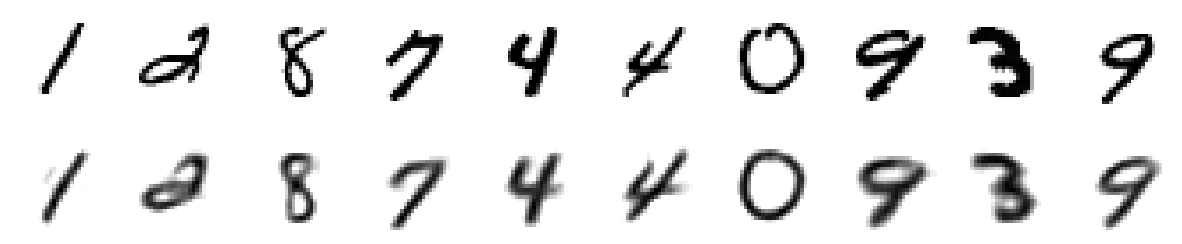

In [16]:
show_reconstructions(variational_ae)

In [19]:
_, _, X_val_latent = variational_encoder.predict(X_test)
tsne = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D = tsne.fit_transform(X_val_latent)

313/313 [==============================] - 0s 1ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


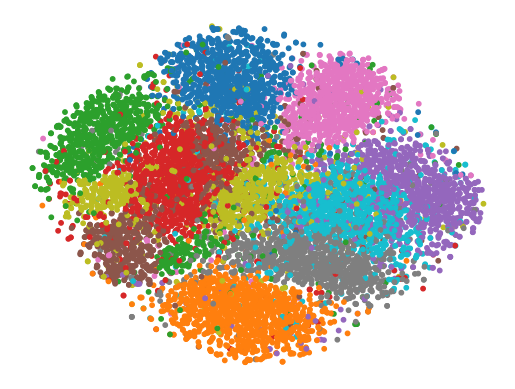

In [20]:
plt.scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
plt.axis('off')
plt.show()

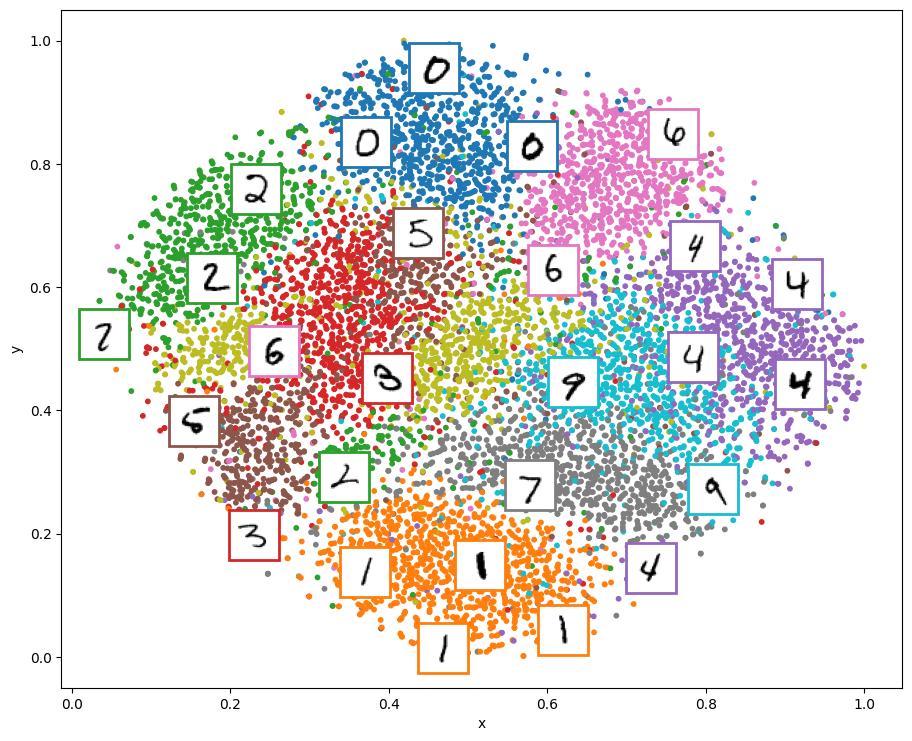

In [23]:
import matplotlib as mpl

plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
Z = X_val_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())  # normalize to the 0-1 range
plt.scatter(Z[:, 0], Z[:, 1], c=y_test, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_test[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test[index]), "lw": 2})
        plt.gca().add_artist(imagebox)

# plt.axis("off")
# crosshair(0.1, 0.1)
plt.xlabel('x')
plt.ylabel('y')
save_fig("mnist_visualization_plot")
plt.show()

### Extra - Classification and Reconstruction

Until here, you see autoencoders applications with only reconstruction on output. But, we can introduce another decoder and make classification together reconstruction. It will lead us to a new concept application with autoencoder: Multi-stage autoencoder. It will be explicity in a figure below:

<div style="text-align:center;">
    <img src="./images/multi_stage_autoencoder.png" alt="Example Image" style="width:600px;">
</div>

In [28]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)
outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

In [29]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

In [30]:
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)

In [31]:
variational_ae.compile(
                        loss=[keras.losses.MeanSquaredError(),
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 6s 10ms/step - loss: 0.4150 - Reconstruction_loss: 0.0532 - Classification_loss: 0.3411 - val_loss: 0.1420 - val_Reconstruction_loss: 0.0482 - val_Classification_loss: 0.0670
Epoch 2/25
430/430 [==============================] - 4s 10ms/step - loss: 0.1550 - Reconstruction_loss: 0.0466 - Classification_loss: 0.0812 - val_loss: 0.1339 - val_Reconstruction_loss: 0.0445 - val_Classification_loss: 0.0628
Epoch 3/25
430/430 [==============================] - 4s 10ms/step - loss: 0.1307 - Reconstruction_loss: 0.0435 - Classification_loss: 0.0605 - val_loss: 0.1337 - val_Reconstruction_loss: 0.0421 - val_Classification_loss: 0.0663
Epoch 4/25
430/430 [==============================] - 4s 10ms/step - loss: 0.1165 - Reconstruction_loss: 0.0418 - Classification_loss: 0.0490 - val_loss: 0.1255 - val_Reconstruction_loss: 0.0412 - val_Classification_loss: 0.0597
Epoch 5/25
430/430 [==============================] - 5s 11ms/step - loss: 0.1087 - 

In [74]:
def show_reconstructions_multi_stage(model, n_images=10):
    output = variational_ae(X_val[:n_images])
    reconstructions = output[0]
    labels_hat = tf.map_fn(fn=lambda x: x.numpy().argmax(), elems=output[1])
    labels_true = y_val[:n_images]
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        
        plt.subplot(2, n_images, 1 + image_index)
        plt.title(f'y_true={int(labels_true[image_index])}')
        plot_image(X_val[image_index])
        
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.title(f'y_hat={int(labels_hat[image_index])}')
        plot_image(reconstructions[image_index])
        

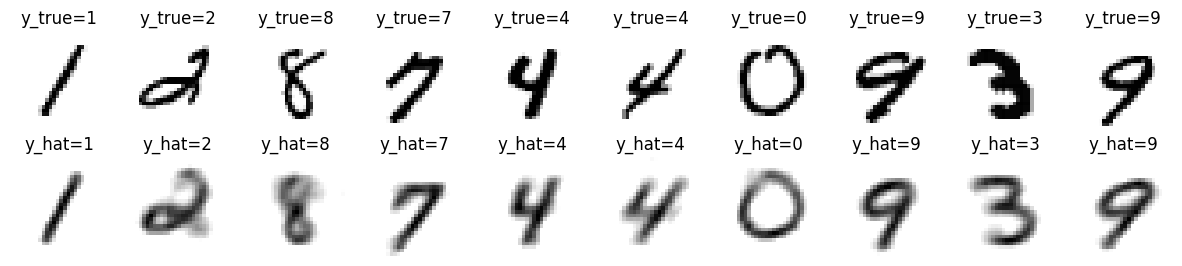

In [75]:
show_reconstructions_multi_stage(variational_ae)

### Latent Space Visualization - With Classification

In [76]:
_, _, X_val_latent_ms = variational_encoder.predict(X_test)
tsne_ms = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D_ms = tsne_ms.fit_transform(X_val_latent_ms)

313/313 [==============================] - 1s 2ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


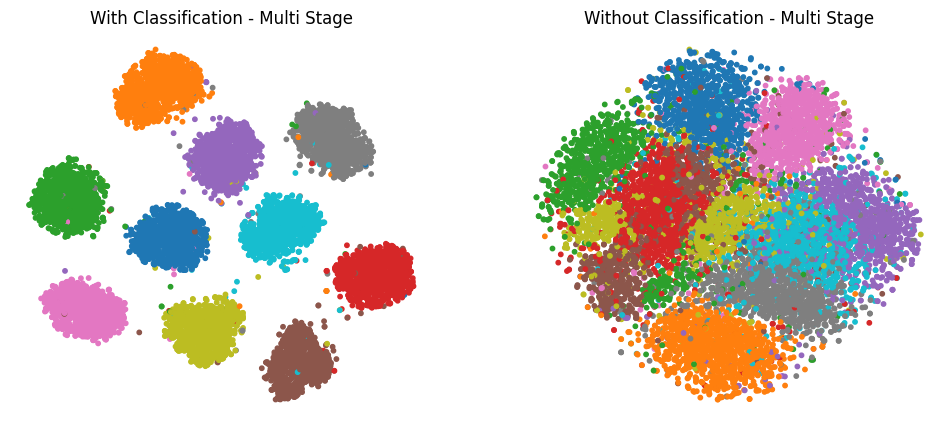

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_val_2D_ms[:, 0], X_val_2D_ms[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title('With Classification - Multi Stage')
axs[0].axis('off')

axs[1].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('Without Classification - Multi Stage')
axs[1].axis('off')
plt.show()

Look at magnific picture! In both cases we compute Divergence KL and just one of them aproximate the clusters classes and in another all cluster will separated. So let think about this, why clusters in first case will separate like image? 

- It occur because encoder receive information in backpropagation by both decoders. And both gradients of loss (MSE and Cross Entropy) in outputs influence encoder to modify latent space. 

## Extra suggestion:

Lets elevate divergence KL and lets see what happen!

In [84]:
codings_size = 16
inputs = tf.keras.layers.Input(shape=[28, 28])
Z = keras.layers.Reshape([28, 28, 1])(inputs)
Z = keras.layers.Conv2D(16, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

Z = keras.layers.Conv2D(64, 3, padding="same", activation="relu")(Z)
Z = keras.layers.MaxPool2D(pool_size=2)(Z)
Z = keras.layers.BatchNormalization()(Z)

# Z = keras.layers.Conv2D(30, 3, padding="same", activation="relu")(Z)
# Z = keras.layers.GlobalAvgPool2D()(Z) # Output 30
Z = keras.layers.Flatten()(Z)
Z = keras.layers.Dense(30, activation='sigmoid')(Z)


codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # μ
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # γ
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = tf.keras.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])


decoder_inputs_A = tf.keras.layers.Input(shape=[codings_size])
x_A = keras.layers.Dense(7 * 7 * 64)(decoder_inputs_A)
x_A = keras.layers.Reshape((7, 7, 64))(x_A)
x_A = keras.layers.Conv2DTranspose(64, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

x_A = keras.layers.Conv2DTranspose(16, 3, padding='same', activation='relu')(x_A)
x_A = keras.layers.UpSampling2D(2)(x_A)

outputs_A = keras.layers.Conv2DTranspose(1, 3, padding='same', activation='relu')(x_A)

variational_decoder_A = tf.keras.Model(inputs=[decoder_inputs_A], outputs=[outputs_A], name='Reconstruction')



decoder_inputs_B = tf.keras.layers.Input(shape=[codings_size])
x_B = keras.layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs_B)
x_B = keras.layers.Dense(128, activation='relu')(x_B)
x_B = keras.layers.Dense(64, activation='relu')(x_B)
x_B = keras.layers.Dense(32, activation='relu')(x_B)
outputs_B = keras.layers.Dense(10, activation='softmax')(x_B)

variational_decoder_B = tf.keras.Model(inputs=[decoder_inputs_B], outputs=[outputs_B], name='Classification')

In [85]:
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder_A(codings)
classifications = variational_decoder_B(codings)

variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions, classifications])

In [86]:
beta = 5
latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)
variational_ae.add_loss(beta * (tf.reduce_mean(latent_loss) / 784.))

In [87]:
variational_ae.compile(
                        loss=[keras.losses.MeanSquaredError(),
                              keras.losses.SparseCategoricalCrossentropy()], 
                        optimizer=keras.optimizers.RMSprop()
                       )

history_vae = variational_ae.fit(
                                 X_train, [X_train, y_train], 
                                 epochs=25, 
                                 batch_size=128,
                                 validation_data=(X_val, [X_val, y_val])
                                 )

Epoch 1/25
430/430 [==============================] - 6s 11ms/step - loss: 0.4860 - Reconstruction_loss: 0.0537 - Classification_loss: 0.3603 - val_loss: 0.1994 - val_Reconstruction_loss: 0.0490 - val_Classification_loss: 0.0687
Epoch 2/25
430/430 [==============================] - 5s 11ms/step - loss: 0.2148 - Reconstruction_loss: 0.0495 - Classification_loss: 0.0916 - val_loss: 0.2122 - val_Reconstruction_loss: 0.0480 - val_Classification_loss: 0.0932
Epoch 3/25
430/430 [==============================] - 5s 11ms/step - loss: 0.1841 - Reconstruction_loss: 0.0489 - Classification_loss: 0.0692 - val_loss: 0.1903 - val_Reconstruction_loss: 0.0480 - val_Classification_loss: 0.0784
Epoch 4/25
430/430 [==============================] - 5s 11ms/step - loss: 0.1667 - Reconstruction_loss: 0.0481 - Classification_loss: 0.0569 - val_loss: 0.1785 - val_Reconstruction_loss: 0.0469 - val_Classification_loss: 0.0738
Epoch 5/25
430/430 [==============================] - 4s 10ms/step - loss: 0.1526 - 

In [89]:
_, _, X_val_latent_ms_KL = variational_encoder.predict(X_test)
tsne_ms = TSNE(init='pca', learning_rate='auto', random_state=42)
X_val_2D_ms = tsne_ms.fit_transform(X_val_latent_ms_KL)

313/313 [==============================] - 0s 1ms/step


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


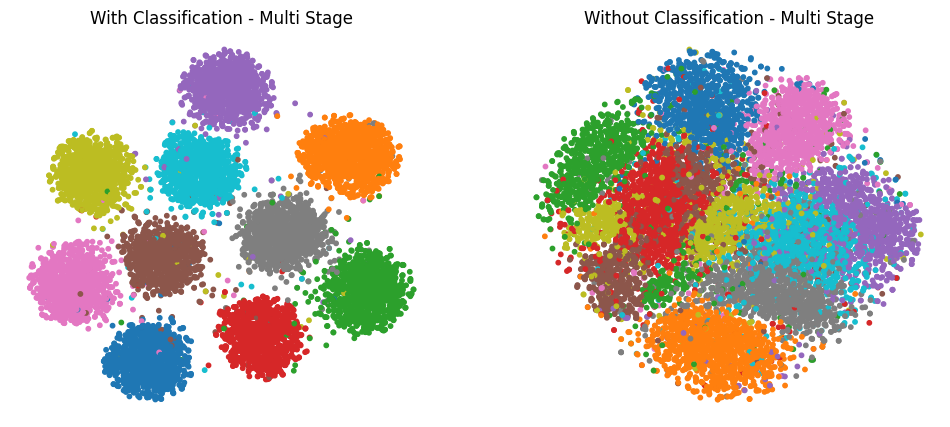

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_val_2D_ms[:, 0], X_val_2D_ms[:, 1], c=y_test, s=10, cmap='tab10')
axs[0].set_title('With Classification - Multi Stage')
axs[0].axis('off')

axs[1].scatter(X_val_2D[:, 0], X_val_2D[:, 1], c=y_test, s=10, cmap='tab10')
axs[1].set_title('Without Classification - Multi Stage')
axs[1].axis('off')
plt.show()

## Last Suggestion:

Try to increase beta value in KL divergence and see all clusters closer more and more.

## Confusion matrix with classifier

In [109]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [97]:
y_test_hat = tf.map_fn(fn=lambda x: x.numpy().argmax(), elems=variational_ae.predict(X_test)[1]).numpy()

313/313 [==============================] - 1s 2ms/step


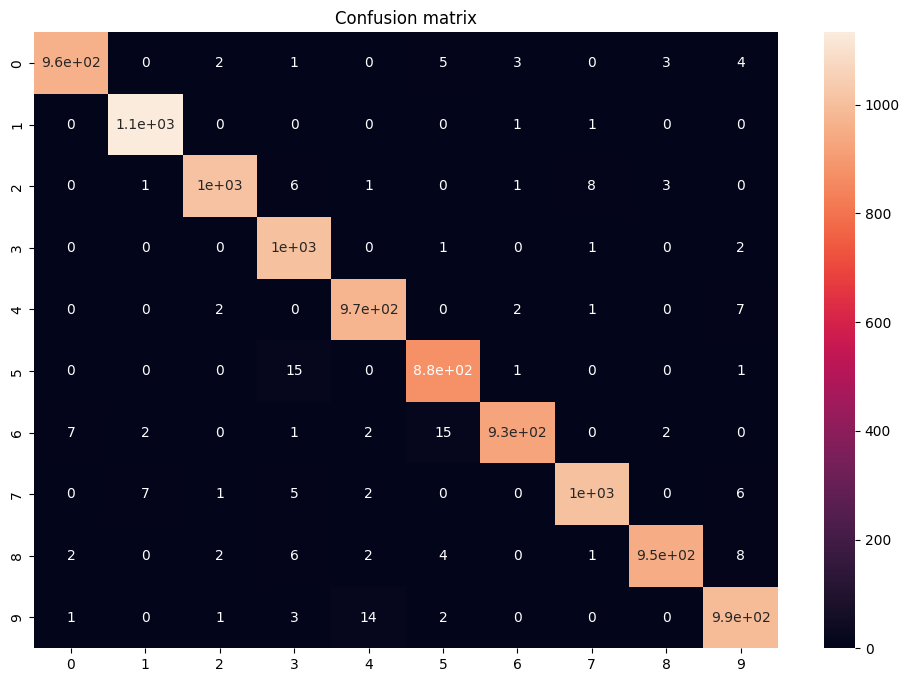

In [106]:
matrix = confusion_matrix(y_test, y_test_hat)
plt.figure(figsize=(12, 8))
plt.title('Confusion matrix')
sns.heatmap(matrix, annot=True);

In [115]:
accuracy = accuracy_score(y_test, y_test_hat)
precision = precision_score(y_test, y_test_hat, average='macro')
recall = recall_score(y_test, y_test_hat, average='macro')
f1score = f1_score(y_test, y_test_hat, average='macro')

print(f"Accuracy = {accuracy.round(5)}")
print(f"Precision = {precision.round(5)}")
print(f"Recall = {recall.round(5)}")
print(f"F1 Score = {f1score.round(5)}")

Accuracy = 0.9831
Precision = 0.98303
Recall = 0.98281
F1 Score = 0.98286


## Analitic Geometry

Let's use some geometry analitic to find centroid of all numbers/classes